## Import data

In [1]:
import sys
sys.path.append('..')
from pipeline import CleaningPipe

`path_to_eeg` - can be any type of eeg file that MNE's [read_raw](https://mne.tools/stable/generated/mne.io.read_raw.html) function supports.

`output_directory` - a directory you want the results to be saved in

In [2]:
pipe = CleaningPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\HZ4_SLEEP_20210629_132715.mff",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing")

Reading EGI MFF Header from C:\Users\Gennadiy\Documents\data\HZ4\HZ4_SLEEP_20210629_132715.mff...
    Reading events ...
    Assembling measurement info ...


## Preprocessing

### Resampling

`sfreq` - desired sampling frequency

`save` - if true, saves resampled eeg data and metadata in .fif files.

In [5]:
pipe.resample(
    sfreq=250,
    save=True
    )

Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\resampled_250hz_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\resampled_250hz_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\resampled_250hz_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\resampled_250hz_raw.fif
[done]


### Filtering

#### High pass

In [7]:
pipe.plot()

Channels marked as bad:
none


`savefig` - save filter info plot. [FIR filters](https://mne.tools/stable/auto_tutorials/preprocessing/25_background_filtering.html#fir-filters).

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Filter length: 2751 samples (11.004 sec)

Using CUDA for FFT FIR filtering
Setting up band-pass filter from 0.3 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-12 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 124.90 Hz
- Upper transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 124.95 Hz)
- Fil

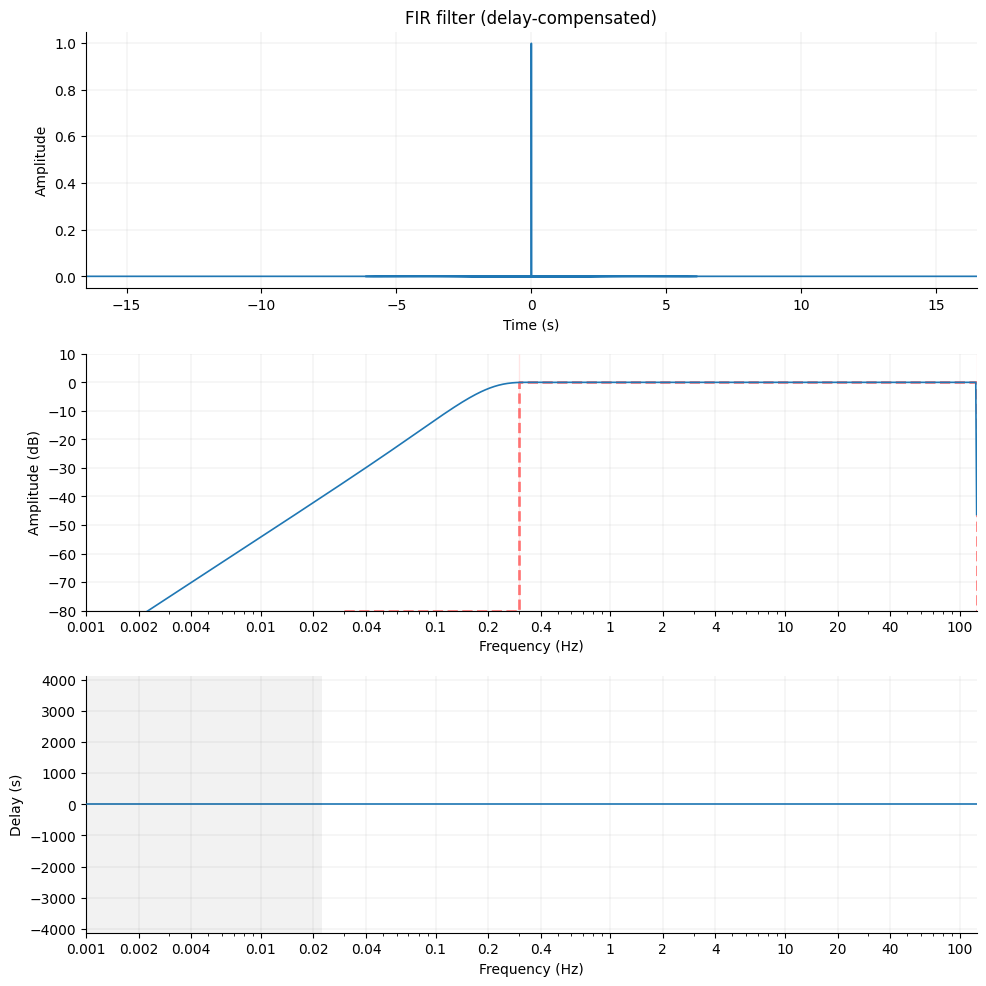

In [6]:
pipe.filter(
    l_freq=0.3)

#### Notch

In [7]:
pipe.notch()

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Using CUDA for FFT FIR filtering


In [ ]:
pipe.plot()

Using qt as 2D backend.
Channels marked as bad:
none


### Bad channels & bad epochs

Create average reference projection

In [16]:
pipe.mne_raw.set_eeg_reference(projection=True)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<Raw | 250hz_raw.fif, 271 x 5054268 (20217.1 s), ~10.21 GB, data loaded>

#### Select bad channels

`save_bad_channels` - if true, saves bad channels to *bad_channels.txt* file.

Also, check out the butterfly mode by using *b* shortcut while in the browser.

In [22]:
pipe.plot(
    save_bad_channels=True
)

Channels marked as bad:
['E3', 'E18', 'E37', 'E31', 'E32', 'E82', 'E25', 'E2', 'E10', 'E11', 'E12', 'E91', 'E216', 'E209', 'E228', 'E118', 'E69', 'E250', 'E246', 'E248', 'E67', 'E255', 'E208', 'VREF', 'E244', 'E9', 'E245', 'E240', 'E137']


If you want to continue with previously saved bad channels, use `pipe.read_bad_channels()`. The function will import the channels from *bad_channels.txt* file in the output directory.

In [ ]:
pipe.read_bad_channels()

#### Interpolate bad channels

Interpolate bad channels by [spherical spline interpolation](https://mne.tools/stable/overview/implementation.html#bad-channel-repair-via-interpolation)

`reset_bads` - bad channels are saved in a txt file, so we can reset it in our current metadata

In [23]:
pipe.mne_raw.interpolate_bads(reset_bads=True)

Interpolating bad channels
    Automatic origin fit: head of radius 96.5 mm
Computing interpolation matrix from 228 sensor positions
Interpolating 29 sensors


<Raw | 250hz_raw.fif, 271 x 5054268 (20217.1 s), ~10.21 GB, data loaded>

In [20]:
pipe.plot()

Channels marked as bad:
['E3', 'E18', 'E37', 'E31', 'E32', 'E82', 'E25', 'E2', 'E10', 'E11', 'E12', 'E91', 'E216', 'E209', 'E228', 'E118', 'E69', 'E250', 'E246', 'E248', 'E67', 'E255', 'E208', 'VREF', 'E244', 'E9', 'E245']


#### Select bad epochs

In [24]:
pipe.plot(butterfly=True, save_annotations=True)

Channels marked as bad:
['E3', 'E18', 'E37', 'E31', 'E32', 'E82', 'E25', 'E2', 'E10', 'E11', 'E12', 'E91', 'E216', 'E209', 'E228', 'E118', 'E69', 'E250', 'E246', 'E248', 'E67', 'E255', 'E208', 'VREF', 'E244', 'E9', 'E245', 'E240', 'E137']
Overwriting existing file.


If you want to continue with previously saved annotations, use `pipe.read_annotations()`. The function will import the annotations from *annotations.txt* file in the output directory.

In [ ]:
pipe.read_annotations()

c:\Users\Gennadiy\Documents\eeg-processing-pipeline\pipeline\pipeline.py:105: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.mne_raw.set_annotations(read_annotations(self.output_dir / 'annotations.txt'))


### Save

In [8]:
pipe._save_raw('cleaned_raw.fif')

Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_raw.fif
[done]
